In [1]:
#standard DS imports
import pandas as pd
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import env
import os

In [8]:
query = '''select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
        from properties_2017
        WHERE propertylandusetypeid = 261
        '''

In [9]:
url = env.get_db_url('zillow')

In [10]:
zillow = pd.read_sql(query, url)

In [11]:
zillow.sample(10)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1192657,4.0,2.0,1639.0,267827.0,1954.0,3375.48,6059.0
215665,3.0,2.0,1830.0,387905.0,1978.0,4140.08,6111.0
411469,4.0,2.0,1704.0,247720.0,1953.0,3144.85,6037.0
1257343,4.0,2.0,1774.0,350830.0,1964.0,4042.20,6059.0
1400611,4.0,2.0,1929.0,303386.0,1978.0,3658.99,6037.0
9852,3.0,2.5,1955.0,476489.0,1989.0,5843.40,6059.0
1260815,3.0,2.0,1647.0,406099.0,1950.0,4992.59,6037.0
1333490,4.0,2.0,1853.0,641638.0,1966.0,7603.08,6059.0
97235,3.0,2.0,1287.0,335839.0,1964.0,3588.66,6111.0
1365879,3.0,1.0,1181.0,417267.0,1953.0,5003.22,6059.0


In [15]:
zillow.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [13]:
zillow.shape

(2152863, 7)

In [16]:
df = w.wrangle_zillow()

this file exists, reading from csv


In [23]:
df.isnull().any()

bedroomcnt                      False
bathroomcnt                     False
calculatedfinishedsquarefeet    False
taxvaluedollarcnt               False
yearbuilt                       False
taxamount                       False
fips                            False
dtype: bool

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
yearbuilt,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


In [28]:
df.fips.value_counts()

fips
6037    1425207
6059     552057
6111     162971
Name: count, dtype: int64

In [26]:
df.shape

(2140235, 7)

In [19]:
df = df.dropna()

In [20]:
df.isnull().any()

bedroomcnt                      False
bathroomcnt                     False
calculatedfinishedsquarefeet    False
taxvaluedollarcnt               False
yearbuilt                       False
taxamount                       False
fips                            False
dtype: bool

In [21]:
df.yearbuilt = df.yearbuilt.astype(int)
df.bedroomcnt = df.bedroomcnt.astype(int)
df.fips = df.fips.astype(int)
df.taxvaluedollarcnt = df.taxvaluedollarcnt.astype(int)
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int)

In [22]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                              int64
dtype: object

In [29]:
df = df.rename(columns={'bedroomcnt':'bedrooms',
                       'bathroomcnt':'bathrooms',
                       'calculatedfinishedsquarefeet':'area',
                       'taxvaluedollarcnt':'salesamount',
                       'fips':'county'})

In [33]:
df.head()

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [34]:
df.county = df.county.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})

In [35]:
df.county

4              LA
6              LA
7              LA
11             LA
14             LA
            ...  
2152856        LA
2152858    Orange
2152859    Orange
2152861    Orange
2152862        LA
Name: county, Length: 2140235, dtype: object

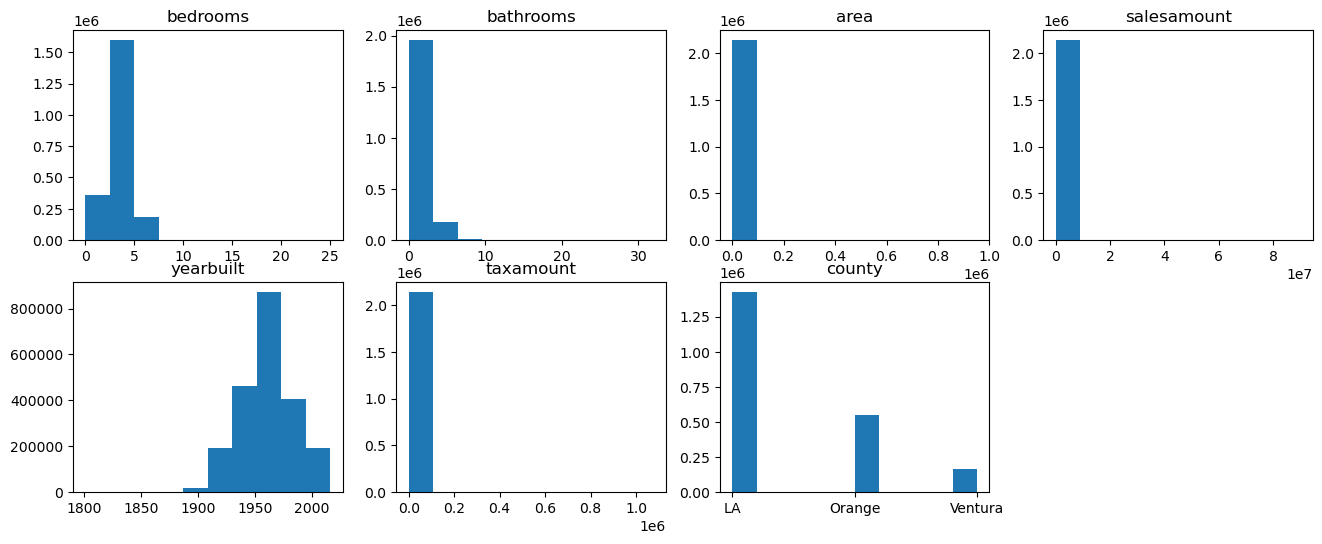

In [36]:
plt.figure(figsize=(16,6))

for i, col in enumerate(df.columns):
    plot_number = i+1
    plt.subplot(2,4, plot_number)
    plt.title(col)
    plt.hist(df[col])

bedrooms
bathrooms
area
salesamount
yearbuilt
taxamount


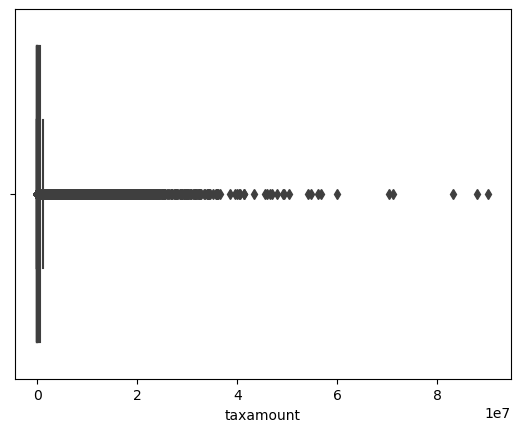

In [38]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show
    
    #print(df[col].value_counts())
    # needs last portion of code